In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


In [3]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

print("\nDataset Shape:", df.shape)
print("\nTarget Classes:", data.target_names)
print("\nFirst 5 rows:\n", df.head())



Dataset Shape: (569, 31)

Target Classes: ['malignant' 'benign']

First 5 rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fr

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [7]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [8]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.9736842105263158


In [9]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))



Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix:
 [[41  2]
 [ 1 70]]


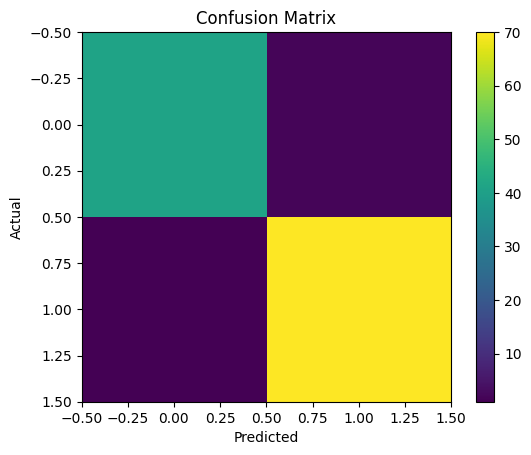

In [10]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


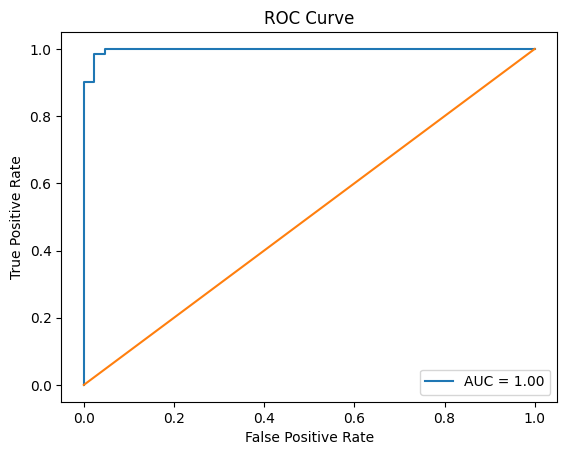

ROC-AUC Score: 0.99737962659679


In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc)

In [12]:
importance = model.coef_[0]
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:\n")
print(feature_importance.head(10))


Top 10 Important Features:

                    Feature  Importance
15        compactness error    0.682491
19  fractal dimension error    0.616230
5          mean compactness    0.540164
18           symmetry error    0.500425
8             mean symmetry    0.236119
11            texture error    0.188877
16          concavity error    0.175275
9    mean fractal dimension    0.075921
25        worst compactness    0.016110
4           mean smoothness   -0.071667


In [13]:

sample = X_test[0].reshape(1, -1)
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)[0]
probability = model.predict_proba(sample_scaled)[0][prediction]

print("\nSample Prediction Result")
print("Predicted Class:", data.target_names[prediction])
print("Prediction Confidence:", round(probability * 100, 2), "%")



Sample Prediction Result:
Predicted Class: benign
Prediction Confidence: 88.64 %
